# Library imports

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import datetime
from sklearn.ensemble import RandomForestRegressor

# Preparing data


## Data import

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

## Combine test and train into one file

In [3]:
train['source'] = 'train'
test['source'] = 'test'
data = pd.concat([train, test], ignore_index=True, sort=False)
print(train.shape, test.shape, data.shape)

(234828, 20) (100282, 19) (335110, 20)


In [4]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335110 entries, 0 to 335109
Data columns (total 20 columns):
id                          335110 non-null int64
seller_type                 335110 non-null object
country_of_use              335110 non-null object
weblog_date                 335110 non-null object
Area_address_code           335110 non-null int64
car_name                    335110 non-null object
car_type                    293378 non-null object
Permit_registration_year    335110 non-null int64
registration_month          335110 non-null int64
horse_power                 335110 non-null int64
mileage                     335110 non-null int64
gas_type                    311076 non-null object
car_brand                   335110 non-null object
Status_of_car_repair        279780 non-null object
gear_type                   321525 non-null object
date_of_advert              335110 non-null object
last_advert_online          335110 non-null object
model                       

,id,seller_type,country_of_use,weblog_date,Area_address_code,car_name,car_type,Permit_registration_year,registration_month,horse_power,mileage,gas_type,car_brand,Status_of_car_repair,gear_type,date_of_advert,last_advert_online,model,naira_price,source
0,0,private,london,24/03/2016,66954,A5_Sportback_2.7_Tdi,coupé,2013,5,190,201125,diesel,audi,ja,manuell,24/03/2016,07/04/2016,NaN,6588000.0,train
1,1,private,london,14/03/2016,90480,"Jeep_Grand_Cherokee_""Overland""",NaN,2006,8,163,201125,diesel,jeep,NaN,automatik,14/03/2016,05/04/2016,grand,3528000.0,train
2,3,private,london,31/03/2016,60437,Skoda_Fabia_1.4_TDI_PD_Classic,small car,2010,7,69,144810,diesel,skoda,nein,manuell,31/03/2016,06/04/2016,fabia,1296000.0,train
3,4,private,london,04/04/2016,33775,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,limousine,1997,10,102,241350,gasoline,bmw,ja,manuell,04/04/2016,06/04/2016,3er,234000.0,train
4,5,private,london,01/04/2016,67112,Peugeot_206_CC_110_Platinum,convertible,2006,8,109,241350,gasoline,peugeot,nein,manuell,01/04/2016,05/04/2016,2_reihe,792000.0,train


In [5]:
data.shape

(335110, 20)

## Data Cleaning

In [6]:
data_set = data.drop(['weblog_date', 'date_of_advert', 'last_advert_online','id'], axis=1)

In [7]:
data_set.car_name.describe()

count       335110
unique      206197
top       BMW_318i
freq           627
Name: car_name, dtype: object

In [8]:
data_set = data_set.drop('car_name', 1)

In [9]:
data_set.seller_type.value_counts()

private    335110
Name: seller_type, dtype: int64

In [10]:
data_set = data_set.drop('seller_type', 1)

In [11]:
data_set.country_of_use.value_counts()

london    335110
Name: country_of_use, dtype: int64

In [12]:
data_set = data_set.drop('country_of_use', 1)

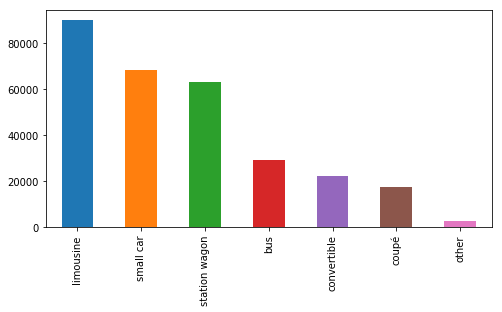

In [13]:
data_set.car_type.value_counts().plot(kind='bar',figsize=(8,4))

In [14]:
data_set.gear_type.value_counts()

manuell      247350
automatik     74175
Name: gear_type, dtype: int64

In [15]:
data_set.model.describe()

count     319778
unique       251
top         golf
freq       27033
Name: model, dtype: object

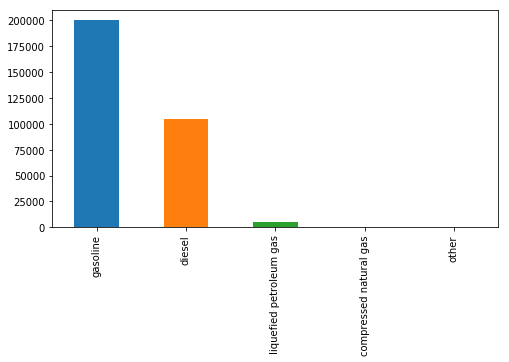

In [16]:
data_set.gas_type.value_counts().plot(kind='bar',figsize=(8,4))

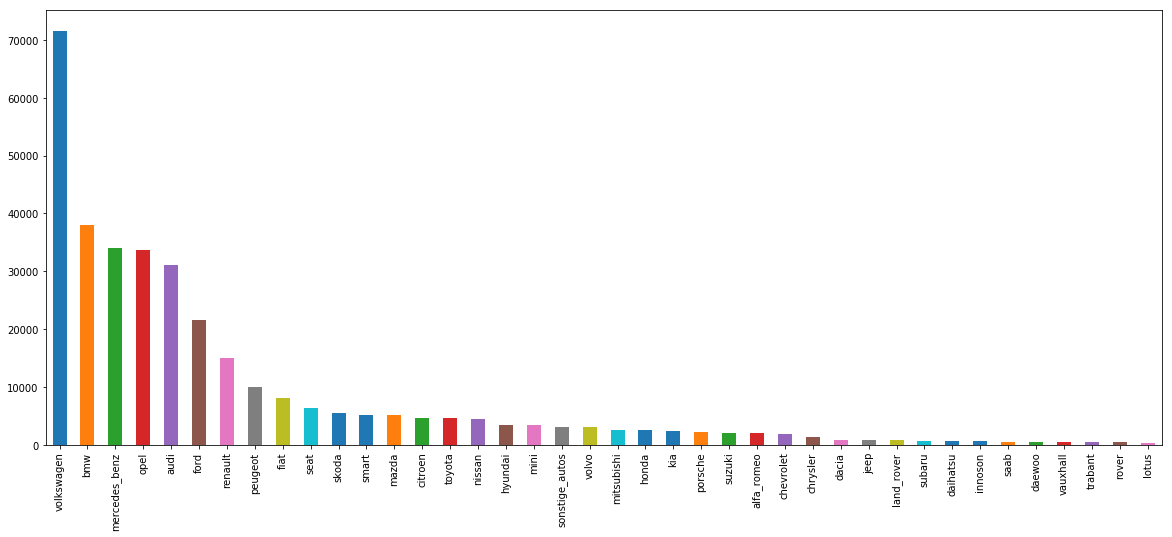

In [17]:
data_set.car_brand.value_counts().plot(kind='bar',figsize=(20,8))

In [18]:
data_set.Status_of_car_repair.value_counts()

nein    253186
ja       26594
Name: Status_of_car_repair, dtype: int64

In [19]:
data_set = data_set.drop('Status_of_car_repair', 1)

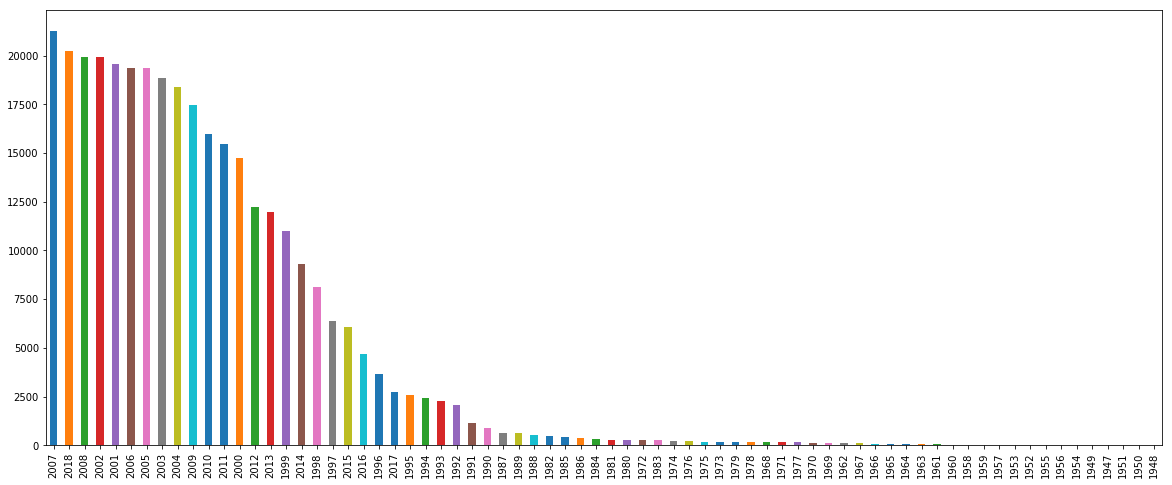

In [20]:
data_set.Permit_registration_year.value_counts().plot(kind='bar',figsize=(20,8))

### Create a new column to calculate how old a car as being in use

In [21]:
now = datetime.datetime.now()
data_set['vehicleAge'] = ((now.year * 12 + now.month) - (data_set.Permit_registration_year * 12 + data_set.registration_month))
data_set = data_set.drop(['registration_month','Permit_registration_year'], 1)

In [22]:
data_set.head()

,Area_address_code,car_type,horse_power,mileage,gas_type,car_brand,gear_type,model,naira_price,source,vehicleAge
0,66954,coupé,190,201125,diesel,audi,manuell,NaN,6588000.0,train,75
1,90480,NaN,163,201125,diesel,jeep,automatik,grand,3528000.0,train,156
2,60437,small car,69,144810,diesel,skoda,manuell,fabia,1296000.0,train,109
3,33775,limousine,102,241350,gasoline,bmw,manuell,3er,234000.0,train,262
4,67112,convertible,109,241350,gasoline,peugeot,manuell,2_reihe,792000.0,train,156


### Check for missing values

In [23]:
print(data_set.isnull().sum())

Area_address_code         0
car_type              41732
horse_power               0
mileage                   0
gas_type              24034
car_brand                 0
gear_type             13585
model                 15332
naira_price          100282
source                    0
vehicleAge                0
dtype: int64


In [24]:
#fill missing values

data_set.car_type.fillna("limousine", inplace=True)
data_set.gas_type.fillna("gasoline", inplace=True)
#data_set.Status_of_car_repair.fillna("nein",inplace=True)
data_set.gear_type.fillna("manuell", inplace=True)
data_set.model.fillna("golf", inplace=True)

In [25]:
print(data_set.isnull().sum())

Area_address_code         0
car_type                  0
horse_power               0
mileage                   0
gas_type                  0
car_brand                 0
gear_type                 0
model                     0
naira_price          100282
source                    0
vehicleAge                0
dtype: int64


In [26]:
data_set.head()

,Area_address_code,car_type,horse_power,mileage,gas_type,car_brand,gear_type,model,naira_price,source,vehicleAge
0,66954,coupé,190,201125,diesel,audi,manuell,golf,6588000.0,train,75
1,90480,limousine,163,201125,diesel,jeep,automatik,grand,3528000.0,train,156
2,60437,small car,69,144810,diesel,skoda,manuell,fabia,1296000.0,train,109
3,33775,limousine,102,241350,gasoline,bmw,manuell,3er,234000.0,train,262
4,67112,convertible,109,241350,gasoline,peugeot,manuell,2_reihe,792000.0,train,156


In [27]:
#make a copy of dataset for safekeeping

copy_data_set = data_set.copy()

### Encode categorical variables

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat = copy_data_set.columns[copy_data_set.dtypes == object]
for col in cat:
    copy_data_set[col] = le.fit_transform(copy_data_set[col])

copy_data_set.head()

,Area_address_code,car_type,horse_power,mileage,gas_type,car_brand,gear_type,model,naira_price,source,vehicleAge
0,66954,2,190,201125,1,1,1,118,6588000.0,1,75
1,90480,3,163,201125,1,14,0,119,3528000.0,1,156
2,60437,5,69,144810,1,30,1,103,1296000.0,1,109
3,33775,3,102,241350,2,2,1,11,234000.0,1,262
4,67112,1,109,241350,2,24,1,8,792000.0,1,156


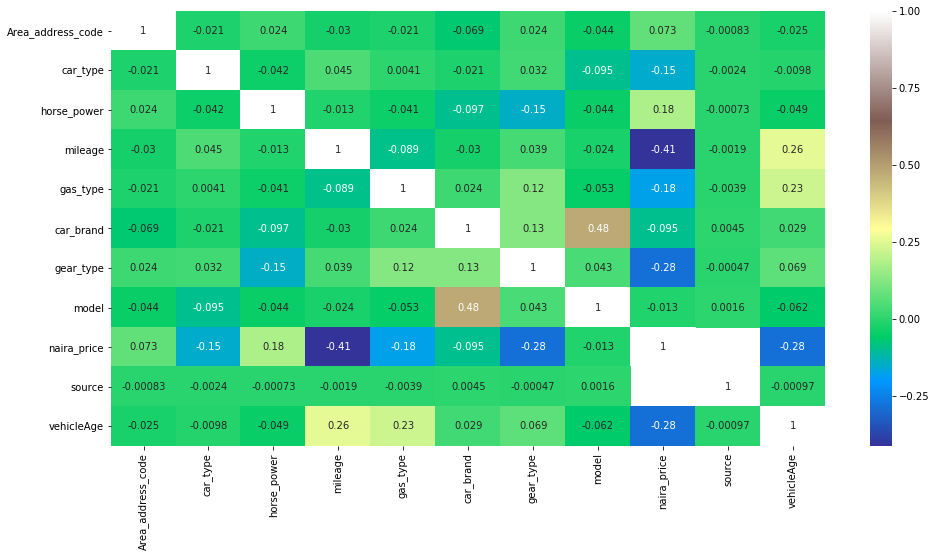

In [29]:
#plot heatmap of correlation between features

plt.figure(figsize=(16,8))
sns.heatmap(copy_data_set.corr(), annot=True, cmap="terrain")

## Split into test and train 

In [30]:
#Divide into test and train:
train = copy_data_set.loc[data['source'] == "train"]
test = copy_data_set.loc[data['source'] == "test"]

#Drop unnecessary columns:
labels = train.naira_price

test.drop(['naira_price', 'source'], axis=1, inplace=True)
train.drop(['source'], axis=1, inplace=True)

C:\Users\mo.yosiwealth\Anaconda\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


# Parameter tuning for random forest 

In [31]:
sample_data = train.sample(frac=0.01, replace=True)
y = sample_data['naira_price']
X = sample_data.drop(['naira_price'], axis=1)
X.shape, y.shape

((2348, 9), (2348,))

In [32]:
#Searching for the best parameter using GridSearchCV

from sklearn.model_selection import GridSearchCV
gsCV_model = RandomForestRegressor(oob_score=True)

tuned_parameters = {
    'n_estimators': [200],
    'max_features': [2, 4, 8, 'auto'],
    'max_depth': [10, 20],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}

gsCV = GridSearchCV(gsCV_model, tuned_parameters, n_jobs=-1, verbose=1)
gsCV.fit(X, y)

C:\Users\mo.yosiwealth\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   38.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  3.4min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=True, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [10, 20],
      

In [33]:
print(gsCV.best_score_)
print(gsCV.best_params_)

0.5853059731092378
{'max_depth': 20, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 200}


In [34]:
from collections import OrderedDict
from sklearn.datasets import make_classification
ensemble_clfs = [(
    "RandomForestRegressor, max_depth='20', min_samples_split='3', min_samples_leaf='1'",
    RandomForestRegressor(
        warm_start=True,
        max_features=4,
        max_depth=20,
        min_samples_split=3,
        min_samples_leaf=1,
        oob_score=True))]
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

min_estimators = 30
max_estimators = 1000

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1, 50):
        clf.set_params(n_estimators=i)
        clf.fit(X, y)
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

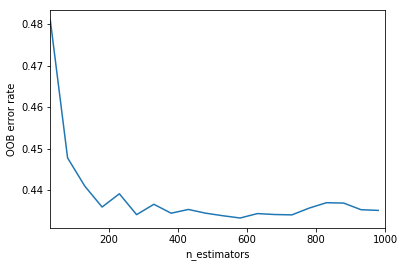

In [35]:
# Generating "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)
plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.show()

# Fitting set to fine tuned RandomForestRegressor model

In [36]:
y = train['naira_price']
X = train.drop(['naira_price'], axis=1)

#splitting to test and train set..
from sklearn.model_selection import train_test_split
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.1)
#format
X_tr.shape, y_tr.shape, X_test.shape, y_test.shape

((211345, 9), (211345,), (23483, 9), (23483,))

In [37]:
model = RandomForestRegressor(
    max_features=4,
    max_depth=20,
    min_samples_leaf=1,
    oob_score=True,
    min_samples_split=3,
    n_estimators=500,
    n_jobs=-1)

model.fit(X_tr, y_tr)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
                      max_features=4, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=3,
                      min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
                      oob_score=True, random_state=None, verbose=0,
                      warm_start=False)

## Results

In [38]:
model.score(X_test,y_test)

0.8300538254040893

In [43]:
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [ ]:
scores = cross_val_score(model, X_tr, y_tr, scoring="neg_mean_squared_error", cv=4)
forest_rmse_scores = np.sqrt(-scores)

display_scores(forest_rmse_scores)

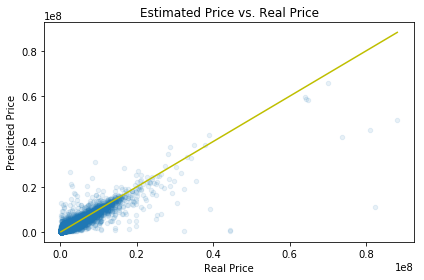

In [40]:
y_pred= model.predict(X_test)

plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, s=20,alpha=0.1)
plt.title('Estimated Price vs. Real Price')
plt.xlabel('Real Price')
plt.ylabel('Predicted Price')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'y')
plt.tight_layout()

# Feature importance

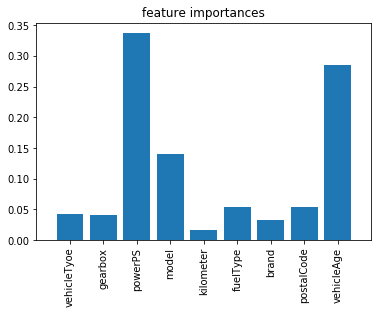

In [41]:
plt.figure()
plt.title("feature importances")
plt.bar(range(X.shape[1]), model.feature_importances_, align="center")
plt.xticks(range(9), ('vehicleTyoe', 'gearbox', 'powerPS', 'model', 'kilometer', 'fuelType', 'brand', 'postalCode', 'vehicleAge'), rotation=90 )
plt.xlim([-1, X.shape[1]])
plt.show()

In [42]:
pred = model.predict(test)


test_to_submit = pd.read_csv("test.csv")
dataframe = pd.DataFrame({'Id':test_to_submit['id'],'Predicted': pred},
                                 columns=['Id','Predicted'])

#to csv
dataframe.to_csv('prediction.csv',index=False)